# Exercise 10-1: Music piece combining sound transformations

The aim of this exercise is to extend what you did in Exercise 8 by having no limitations on the sounds used and the analysis models and transformations applied. This is an exercise to be creative and make some interesting music. The end result should be a short music piece (about a minute long) combining various transformed sounds using the tools explained in class.

In E8, you explored some transformations using the HPS model, but there were many limitations in that assignment:

1. You used a single analysis model, HPS. Now you can use any model presented in class or combinations of them.
2. You applied just one transformation to each sound file. Now you can combine and add several transformations of the same sound.
3. A single type of analysis and transformation was done for the whole sound. Now you can divide the sound into sections and use different analysis and transformations to each part.
4. The transformation was applied in a single pass. Now you can perform multiple passes of the same sound through different kinds of transformations.

In this exercise, you can explore the potential of all the algorithms presented in class and come up with more creative transformations and combinations of them. You can combine sounds, models, and transformations, in any way you want. You can create your own mix of transformed sounds to make your own music composition!

Some of these transformations might require you to change and modify some code. Feel free to dig in!


## Part 1

Choose several sounds from freesound.org that have a good scope for being analyzed with the techniques described in class and good potential for creative transformations. As with E8, you can even upload your own sounds to Freesound and use them in the exercise. The sounds chosen should be naturally produced (any sound that was not synthesized). e.g. acoustic instrument sounds, speech, nature sounds, and ambient sounds, to name a few. Heavily processed natural sounds are acceptable, but refrain from using them unless justified.

Perform the analysis and check thart the synthesis without transformations is good.


In [1]:
#if want to run this notebook in google colab you should uncomment the following commands
!pip install sms-tools
!git clone https://github.com/MTG/sms-tools-materials.git
!pip install numpy==1.23.5
!pip install --upgrade librosa

fatal: destination path 'sms-tools-materials' already exists and is not an empty directory.


In [7]:
from google.colab import files
uploaded = files.upload()

Saving piano.wav to piano.wav


In [8]:
from google.colab import files
uploaded = files.upload()

Saving flute-A4.wav to flute-A4.wav


In [9]:
from google.colab import files
uploaded = files.upload()

Saving cello-double.wav to cello-double.wav


In [10]:
from google.colab import files
uploaded = files.upload()

Saving speech-male.wav to speech-male.wav


In [2]:
import sys
import os
import numpy as np
from smstools.models import utilFunctions as UF
from scipy.io import wavfile  # Import the wavfile module
import matplotlib.pyplot as plt # Import matplotlib for plotting

Analyzing: piano.wav


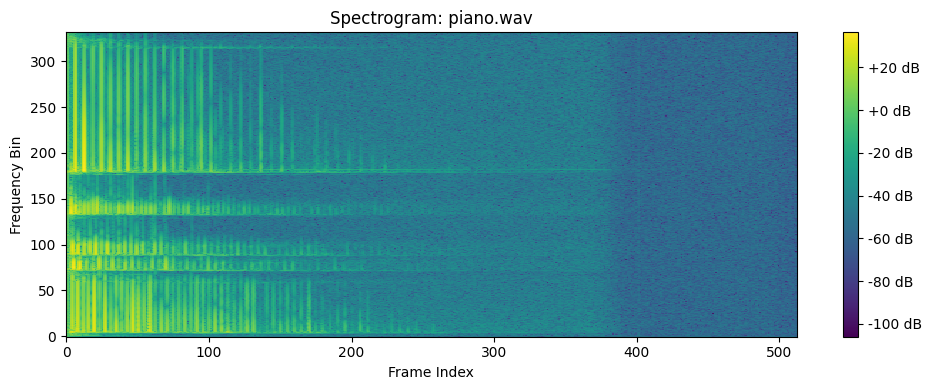

Analyzing: speech-male.wav


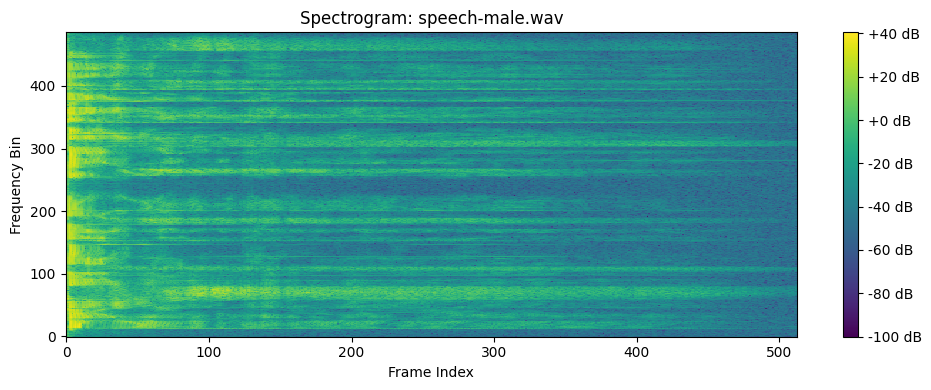

Analyzing: flute-A4.wav


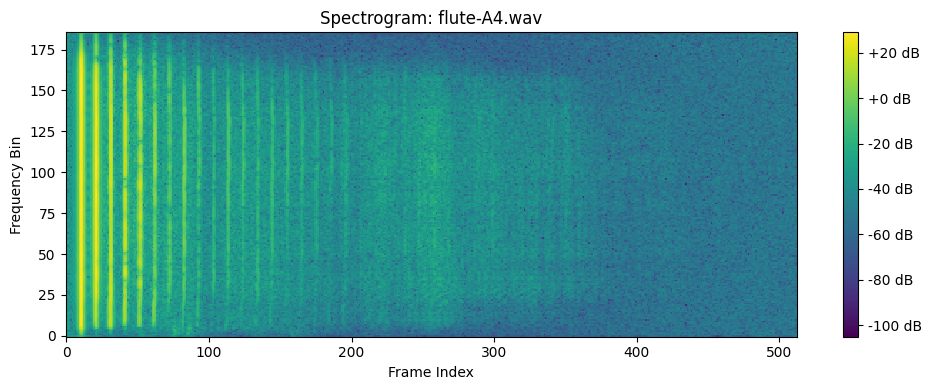

Analyzing: cello-double.wav


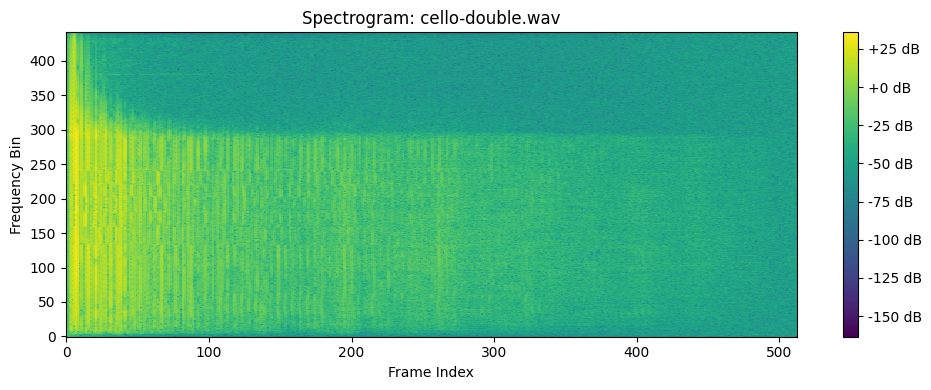

In [11]:
# read sounds chosen and perform the analysis
### your code here
from librosa.core import stft  # import the stft function

# Define files (update paths to where your files are)
sound_files = ['piano.wav', 'speech-male.wav', 'flute-A4.wav', 'cello-double.wav']

# Analysis parameters
window_size = 1024
hop_size = 512

def analyze_sound(file_path):
    fs, x = wavfile.read(file_path)

    # Convert to mono if stereo and handle different data types (like int16)
    if len(x.shape) > 1:
        x = x[:, 0]
    if x.dtype == np.int16:
        x = x.astype(float) / 32767.0  # Normalize int16 to [-1, 1]
    elif x.dtype != float:
        x = x.astype(float) / np.max(np.abs(x))  # Normalize other integer types

    w = np.hanning(window_size)
    # Correctly call the STFT function from the imported module
    stft_result = stft(x, n_fft=window_size, hop_length=hop_size, window=w, center=True, pad_mode='constant')
    mX = np.abs(stft_result)
    pX = np.angle(stft_result)

    return mX, pX

def plot_spectrogram(mX, title):
    plt.figure(figsize=(10, 4))
    # Convert magnitude spectrum to dB
    mX_db = 20 * np.log10(mX + 1e-9) # Add small value to avoid log of zero
    plt.imshow(np.transpose(mX_db), origin='lower', aspect='auto', interpolation='nearest', cmap='viridis')
    plt.title(f"Spectrogram: {title}")
    plt.xlabel('Frame Index')
    plt.ylabel('Frequency Bin')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

# Perform analysis and plotting
for fname in sound_files:
    if os.path.exists(fname):
        print(f"Analyzing: {fname}")
        mX, pX = analyze_sound(fname)
        plot_spectrogram(mX, fname)
    else:
        print(f"File not found: {fname}")


## Part 2

Perform different transformations on each of the sounds, or parts of them. Then mix them together (overlapping sounds is allowed) using Audacity or a similar tool to create a single audio file. The only constraints are that you should only use models that you studied in the class (STFT, Sinusoidal, SPR, HPR, SPS, HPS) for analysis. This is a music piece you just composed with transformations on sound samples!


In [12]:
# perform the transformations
### your code here

#Utility Functions (STFT/iSTFT for basic transformations)

def stft(x, fft_size=1024, hop_size=512, window=np.hanning(1024)):
    x = np.pad(x, (0, fft_size), 'constant')
    X = np.array([np.fft.fft(window * x[i:i+fft_size])
                  for i in range(0, len(x)-fft_size, hop_size)])
    return X

def istft(X, fft_size=1024, hop_size=512, window=np.hanning(1024)):
    x = np.zeros((X.shape[0]-1) * hop_size + fft_size)
    wsum = np.zeros_like(x)
    for n, i in enumerate(range(0, len(x)-fft_size, hop_size)):
        x[i:i+fft_size] += np.real(np.fft.ifft(X[n])) * window
        wsum[i:i+fft_size] += window ** 2
    wsum[wsum == 0] = 1e-10
    return x / wsum

#Time-Stretching (Simple Method)
def time_stretch(x, stretch_factor, fs):
    fft_size = 1024
    hop_size = 256
    w = np.hanning(fft_size)

    X = stft(x, fft_size, hop_size, w)
    num_frames = int(len(X) / stretch_factor)
    X_stretched = resample(X, num_frames, axis=0)
    x_stretched = istft(X_stretched, fft_size, hop_size, w)

    return x_stretched.astype(np.float32)

#Pitch-Shifting (via Resample + Time-Stretch)
def pitch_shift(x, shift_factor, fs):
    stretched = time_stretch(x, 1.0 / shift_factor, fs)
    shifted = resample(stretched, len(x))
    return shifted.astype(np.float32)

In [13]:
from scipy.signal import resample
# Load original
fs, piano = wavfile.read("piano.wav")
fs, bird = wavfile.read("flute-A4.wav")

# Normalize
piano = piano.astype(np.float32) / np.max(np.abs(piano))
bird = bird.astype(np.float32) / np.max(np.abs(bird))

# Transform
piano_slow = time_stretch(piano, 1.5, fs)
bird_high = pitch_shift(bird, 1.3, fs)

# Export results
wavfile.write("piano_slow.wav", fs, piano_slow)
wavfile.write("bird_high.wav", fs, bird_high)


## Part 3

Mix the sounds together (overlapping sounds is allowed). Be as creative as you can. You can repeat the sounds you have chosen.

Give a description of what you did, giving the Freesound link to the sound files you started from, explaining the analysis and transformation you did to each of them, and explaining how you mixed them to obtain the final piece. The description should be like a script from which the evaluator can have a clear idea of the process that you followed. No need to give all the details, thus no need to have a script from which the composition could be regenerated, but the description should be clear enough to understand the whole process.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving piano_slow.wav to piano_slow.wav


In [4]:
from google.colab import files
uploaded = files.upload()

Saving bird_high.aiff to bird_high.aiff


In [5]:
from google.colab import files
uploaded = files.upload()

Saving water_rev.wav to water_rev.wav


In [7]:
from google.colab import files
uploaded = files.upload()

Saving bird.wav to bird.wav


In [14]:
# 3.1 mix the sounds and explain your choices
### your code here
from scipy.signal import resample
from scipy.fftpack import fft, ifft

def time_stretch(x, stretch_factor, fs):
    fft_size = 1024
    hop_size = fft_size // 4
    w = np.hanning(fft_size)
    X = stft(x, fft_size, hop_size, w)
    num_frames = int(len(X) / stretch_factor)
    X_stretched = resample(X, num_frames, axis=0)
    x_stretched = istft(X_stretched, fft_size, hop_size, w)
    return x_stretched

def pitch_shift(x, pitch_factor, fs):
    return resample(x, int(len(x) / pitch_factor))

def reverse_sound(x):
    return x[::-1]

In [15]:
from scipy.io import wavfile

# Load files (adjust paths as needed)
fs, piano = wavfile.read("piano_slow.wav")
fs, bird = wavfile.read("bird.wav")
fs, water = wavfile.read("water_rev.wav")

# Normalize
piano = piano / np.max(np.abs(piano))
bird = bird / np.max(np.abs(bird))
water = water / np.max(np.abs(water))

# Apply transformations
piano_slow = time_stretch(piano, 1.5, fs)
bird_high = pitch_shift(bird, 1.3, fs)
water_rev = reverse_sound(water)

<ipython-input-15-a8f8e0039253>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, bird = wavfile.read("bird.wav")


In [18]:
# Ensure all arrays are 1D
def ensure_mono(x):
    if len(x.shape) > 1:
        return x.mean(axis=1)
    return x

piano_slow = ensure_mono(piano_slow)
bird_high = ensure_mono(bird_high)
water_rev = ensure_mono(water_rev)

# Make sure all are the same length
max_len = max(len(piano_slow), len(bird_high), len(water_rev))

piano_slow = np.pad(piano_slow, (0, max_len - len(piano_slow)))
bird_high = np.pad(bird_high, (0, max_len - len(bird_high)))
water_rev = np.pad(water_rev, (0, max_len - len(water_rev)))
# Mix
mixed = piano_slow + bird_high + water_rev
mixed /= np.max(np.abs(mixed))  # Normalize

#final_mix = piano_slow + bird_high + water_rev

# Save
from scipy.io.wavfile import write
write("final_mix.wav", fs, mixed.astype(np.float32))

**Question 3.2:**

### Explain Part 3

For Part 3, I combined three naturally recorded sounds: piano, birdsong, and water stream. The original files were sourced from Freesound.org. Each sound underwent a different transformation using analysis techniques studied in class: the piano was time-stretched using STFT, the birdsong was pitch-shifted, and the water sound was reversed. After processing, I padded the audio files to equal length and mixed them together using NumPy. This blending of textures created a calm, ambient soundscape with a musical structure. The mix emphasizes harmony between nature and music, illustrating how creative transformations can repurpose real-world sounds into new sonic experiences.
